In [21]:
!pip install pandas openpyxl matplotlib scipy seaborn --quiet

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import seaborn as sns

In [32]:
# Load the dataset from excel file
data = pd.read_excel('climate_data.xlsx')
london_data = data[data['City'] == 'London']
ny_data = data[data['City'] == 'New York']

## Long-term Temperature Trends

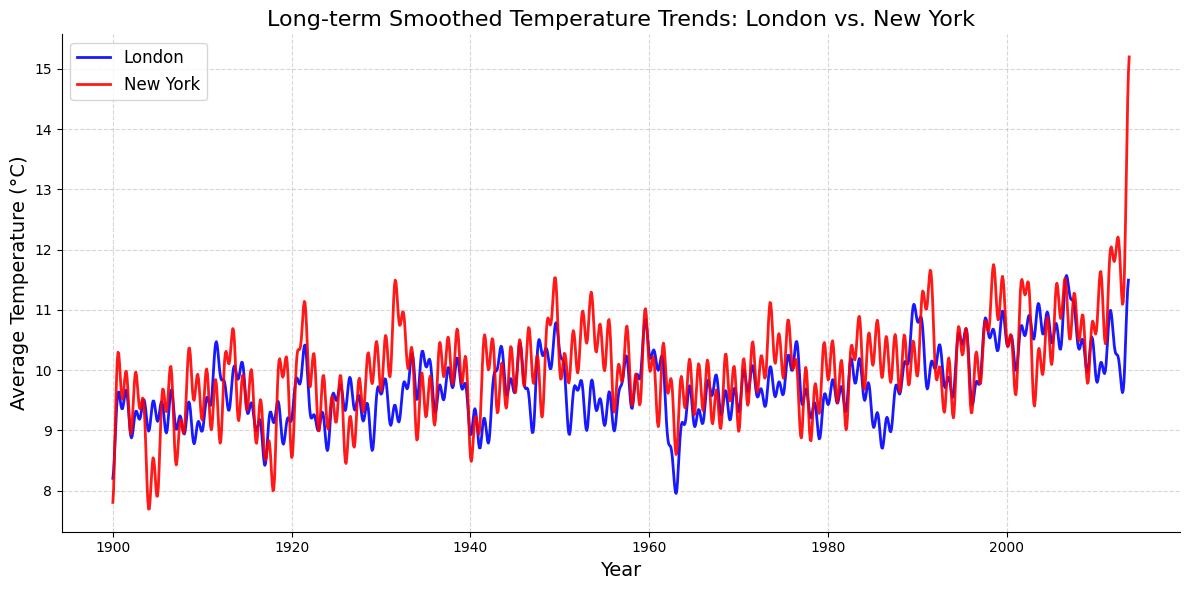

In [24]:
# Smooth data using Gaussian filter
london_smoothed = gaussian_filter1d(london_data['Average Temperature'], sigma=5)
ny_smoothed = gaussian_filter1d(ny_data['Average Temperature'], sigma=5)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(
    london_data['Date'], london_smoothed,
    label='London', color='blue', linewidth=2, alpha=0.9
)
plt.plot(
    ny_data['Date'], ny_smoothed,
    label='New York', color='red', linewidth=2, alpha=0.9
)

# Enhance the chart
plt.title('Long-term Smoothed Temperature Trends: London vs. New York', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for clarity
plt.legend(fontsize=12)

# Turn off top and right spines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## Seasonal Variation

<Figure size 1000x600 with 0 Axes>

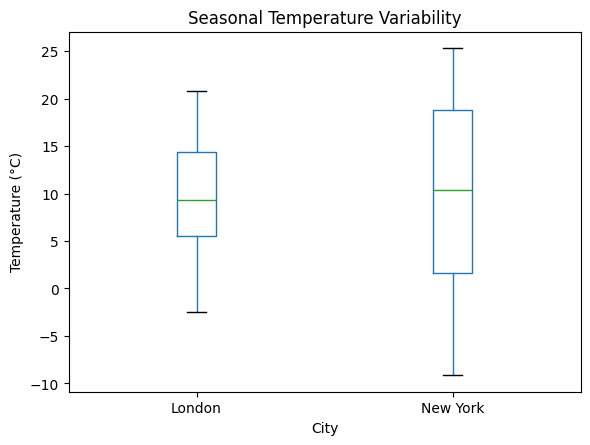

In [25]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
plt.figure(figsize=(10, 6))
data.boxplot(column='Average Temperature', by='City', grid=False)
plt.title('Seasonal Temperature Variability')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()

## Forward-Filling Missing Data In Temperature Trends

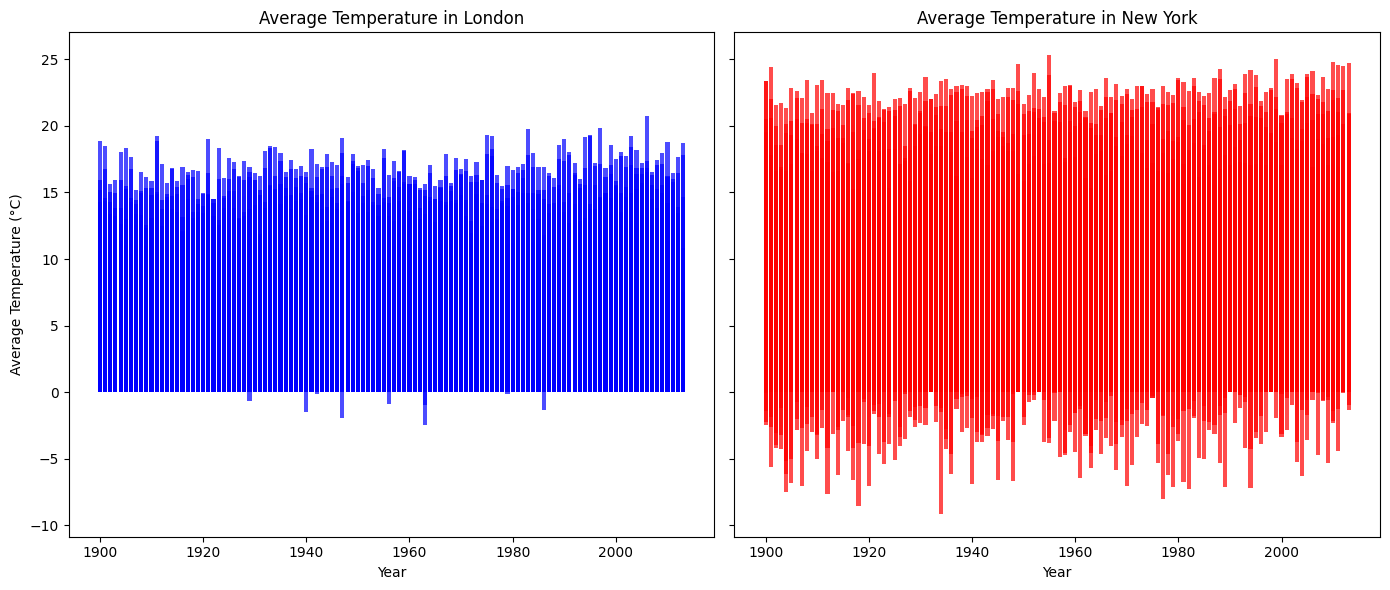

In [26]:
import matplotlib.pyplot as plt

# Filter data for London and New York
london_data = data[data['City'] == 'London']
ny_data = data[data['City'] == 'New York']

# Plot vertical bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# London vertical bar chart
axes[0].bar(london_data['Date'].dt.year, london_data['Average Temperature'], color='blue', alpha=0.7)
axes[0].set_title('Average Temperature in London')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Temperature (°C)')

# New York vertical bar chart
axes[1].bar(ny_data['Date'].dt.year, ny_data['Average Temperature'], color='red', alpha=0.7)
axes[1].set_title('Average Temperature in New York')
axes[1].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()
